#  *Predicting* **Diabetes** 

*Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. The most common is type 2 diabetes, usually in adults, which occurs when the body becomes resistant to insulin or doesn't make enough insulin. In the past three decades the prevalence of type 2 diabetes has risen dramatically in countries of all income levels. Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself. For people living with diabetes, access to affordable treatment, including insulin, is critical to their survival.*

**Data Description :-** 

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree functionr
    Age: Age (years)
    Cabin : Cabin Number
    Outcome: Class variable (0 or 1)


***Importing numpy ,pandas ,matplotlib ,seaborn***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

|from sklearn package   | importing modules|
|-------------   | -----------------|
|preprocessing   | StandardScaler   |
|model_selection | train_test_split, GridSearchCV|
|metrics         | accuracy_score, confusion_matrix|

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
data = pd.read_csv('diabetes.csv')  #import dataset
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>

## **Some stats about data**


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Number of nulls in each column**

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **Correlation Matrix**

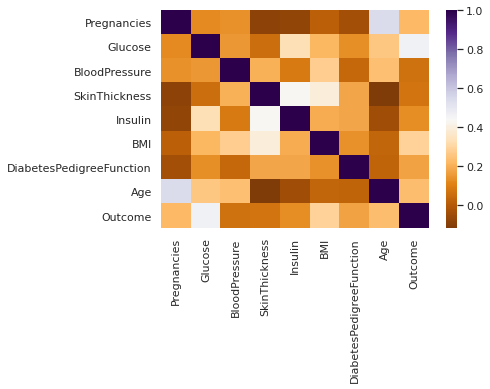

In [ ]:
sns.heatmap(data.corr(),cbar=True,cmap='PuOr',annot=False)

# **EDA**

In [ ]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

### Replacing missing data with 0.

In [ ]:
for i in col:
  data[i].replace(0,data[i].mean(),inplace=True)

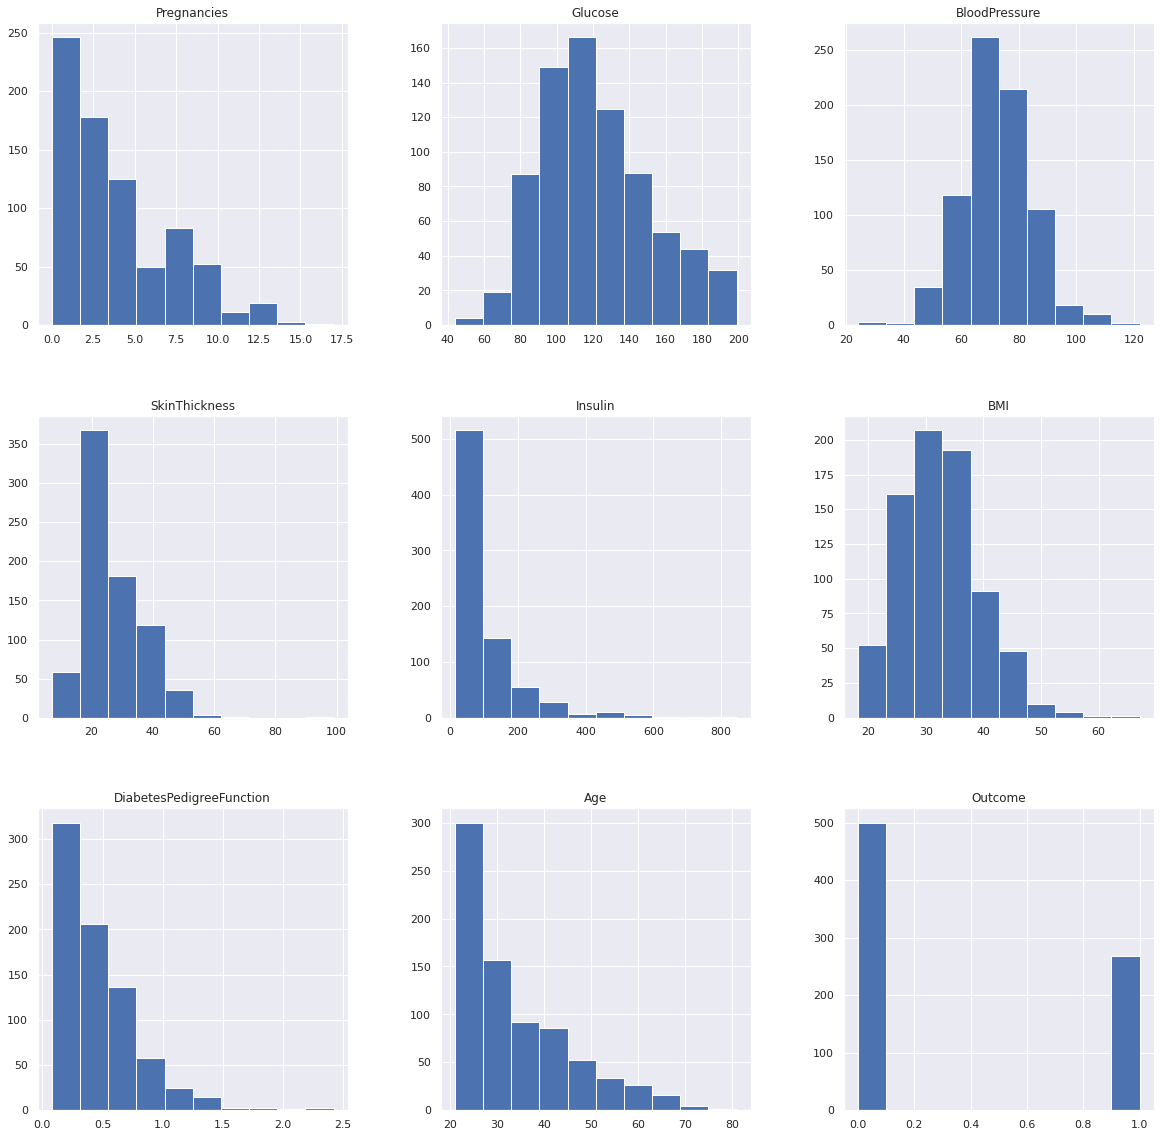

In [ ]:
p=data.hist(figsize = (20,20))

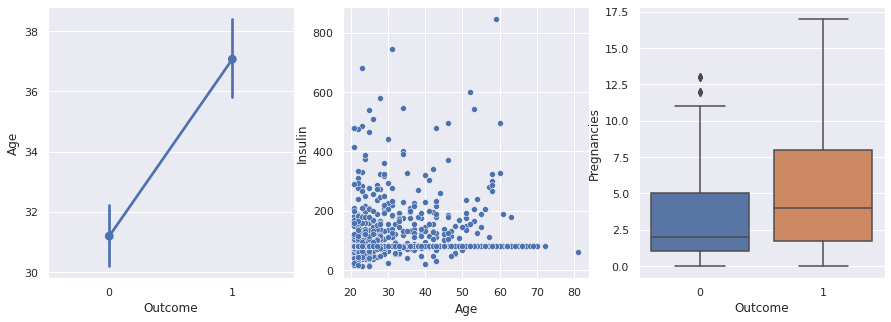

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(15,5))
sns.pointplot(ax= axes[0],x='Outcome', y= 'Age', data=data)
sns.scatterplot(ax = axes[1],x='Age',y='Insulin',data=data)
sns.boxplot(ax = axes[2],x='Outcome',y='Pregnancies',data=data)

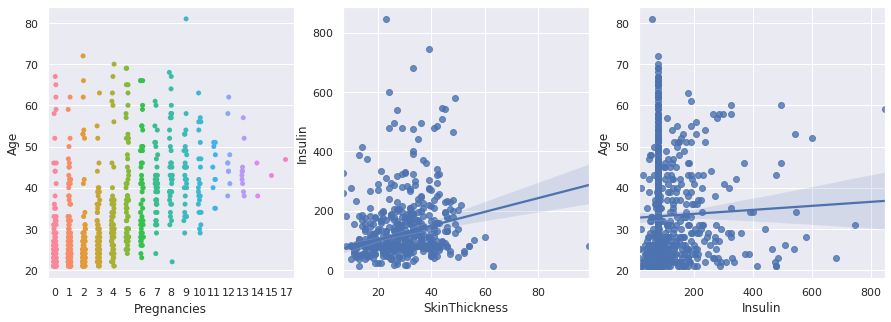

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(15,5))
sns.stripplot(ax = axes[0], x='Pregnancies',y='Age',data=data)
sns.regplot(ax = axes[1],x='SkinThickness', y= 'Insulin', data=data)
sns.regplot(ax = axes[2],x='Insulin',y='Age',data=data)

In [ ]:
data.var()

Pregnancies                   11.354056
Glucose                      926.351048
BloodPressure                146.795798
SkinThickness                 92.760798
Insulin                     8663.952981
BMI                           47.270761
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y=data.Outcome

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split        
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.30,random_state=3)

# **Models**

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split        
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.30,random_state=3)

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:78.77094972067039
Test Set Accuracy:74.45887445887446


## 2. K-Nearest-Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:82.12290502793296
Test Set Accuracy:71.42857142857143


## 3. SVC

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,Y_train)    

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:85.1024208566108
Test Set Accuracy:74.02597402597402


## 4. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:83.42644320297951
Test Set Accuracy:71.42857142857143


## 5. Gradient Boosting Classifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

Train Set Accuracy:94.22718808193669
Test Set Accuracy:74.02597402597402


## 6. XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth=6,n_estimators = 10)
xgb.fit(X_train,Y_train)

xgb_acc= accuracy_score(Y_test,xgb.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,xgb.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,xgb.predict(X_test))*100))

Train Set Accuracy:90.5027932960894
Test Set Accuracy:73.16017316017316


## 7. Stacking

In [ ]:
from sklearn.model_selection import train_test_split     #splitting the dataset                                                             
train,val_train,test,val_test = train_test_split(X,y,test_size=.50,random_state=3)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=.20,random_state=3)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# second model
svm = SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_1=knn.predict(val_train)
pred_2=svm.predict(val_train)

# addition of 2 predictions
result = np.column_stack((pred_1,pred_2))

In [ ]:
pred_test1=knn.predict(x_test)
pred_test2=svm.predict(x_test)
predict_test=np.column_stack((pred_test1,pred_test2))

In [ ]:
# stacking classifier
#RandomForestClasifier:- In this prediction of other 2 classification is taken as x value
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(result,val_test)                   

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rand_clf.score(result,val_test)

0.7291666666666666

In [ ]:
rand_acc=accuracy_score(y_test ,rand_clf.predict(predict_test))
rand_acc

0.7922077922077922

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier',
             'Gradient Boosting Classifier',  'XgBoost','Stacking'],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, gbc_acc, xgb_acc,rand_acc,]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,Stacking,0.792208
0,Logistic,0.744589
2,SVC,0.740260
4,Gradient Boosting Classifier,0.740260
5,XgBoost,0.731602
1,KNN,0.714286
3,Decision Tree Classifier,0.714286


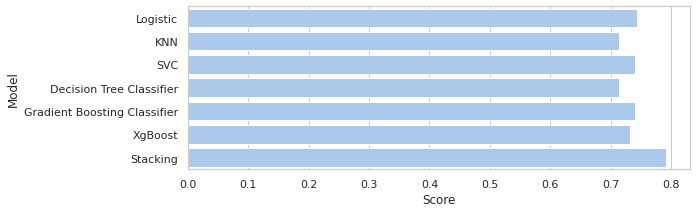

In [ ]:
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
plt.figure(figsize=(9,3))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(y=models['Model'],x=models['Score'],color = 'b')
plt.show()